In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles

In [2]:
input_size = 2 # no. of neurons at I/P layer, or we can say no. of features
layers = [4,3] 
# 4--> no. of neurons at hidden layer-1
# 3--> no. of neurons at hidden layer-2
output_size = 2 # no. of neurons at O/P layer, or we can say no. of classifications

In [3]:
a=np.array([1,2,3,4,5])
np.exp(a)
# if 'a' is a vector then np.exp() output will also be a vector
# [e^1 , e^2, e^3, e^4, e^5]

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [4]:
a=np.array([[5,1,2],[6,1,2]])
print(np.sum(a,axis=1),end='\n\n')
print(np.sum(a,axis=1,keepdims=True)) # basically by doing keepdims its shape is preserved.

[8 9]

[[8]
 [9]]


In [5]:
# It is an activation function used at output layer.
def softmax(a):
    e_pa=np.exp(a) # e_pa will be a vector
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [6]:
a=np.array([[10,10],
           [20,20]])
a_=softmax(a)
a_
# it basically calculates the probability for each class in one example and after appliying softmax
# we can directly use that class which has high probability.

array([[0.5, 0.5],
       [0.5, 0.5]])

In [7]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    """Forward Propagation"""
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1 
        # x is the input matrix --> (m x 2) and W--> (2 x 4). So z1 will be (m x 4)
        # this is basically z[l] = A[l-1].W[l] + b[l], forward propagation formula for multiple examples.
        a1 = np.tanh(z1) # a1 is the activation of (z1) 
        # as sigmoid is not available directly. thats why we are using some another 
        # activation function. This is known as threshold activation function.
            
        z2 = np.dot(a1,W2) + b2 # a1-->(m x 4) and W2-->(4 x 3)
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3 # a2-->(m x 3) and W2-->(3 x 2)
        y_ = softmax(z3) # y_ --> (m x 2) or (m x c)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
    
    """Backward Propagation"""
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y # --> (m x C) where 'C' is the classes.
        dw3 = np.dot(a2.T,delta3) # (3 x C) => (3 x m) X (m x C) 
        db3 = np.sum(delta3,axis=0) # (1 x C)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  # (m x 3) => (m,3) * (m,C X C,3)
        dw2 = np.dot(a1.T,delta2)  # (4 x 3) => (4 x m) X (m x 3)
        db2 = np.sum(delta2,axis=0) # (1 x 3)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) # (m x 4) => (m,4) * (m,3 X 3,4)
        dw1 = np.dot(X.T,delta1) # (2 x 4) => (2 x m) X (m x 4)
        db1 = np.sum(delta1,axis=0) # (1 x 4)
        
        self.model['W1'] -= learning_rate*dw1 # w1 = w1 - η*dw
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x) # x is the input matrix
        return np.argmax(y_out,axis=1) # it will return the max value along row wise. it will be actually 
                                       # that class in a single example which has highest probability.
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [8]:
def loss(y_oht,p): # categorical cross entropy
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0] # no. of examples
    y_oht = np.zeros((m, depth)) # depth is nothing but the no. of classes. y_oht--> (m x c)
    y_oht[np.arange(m), y] = 1 # this will build out one hot matrix
    return y_oht

In [9]:
X,Y=make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [10]:
y_oht=one_hot(Y,2) # as we have 2 classes
print(y_oht.shape,end="\n\n")
print(y_oht)

(500, 2)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]


In [11]:
plt.style.use('seaborn')

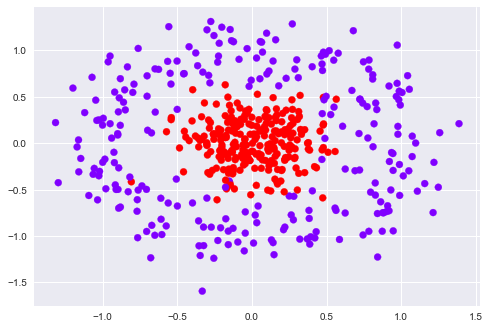

In [12]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='rainbow')
plt.show()

In [13]:
model= NeuralNetwork(input_size=2, layers=[10,5], output_size=2)

In [14]:
print(model.forward(X[0]) )#this is basically the probability of two classes for 1st example
model.forward(X)

[[0.52335135 0.47664865]]


array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [15]:
model.summary() # it is showing dimensions of each matrix(ie, weight, activation and output matrix)

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [16]:
def train(X,Y,model,epochs,logs=True):
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y)) # no. of output classes
    Y_OHT = one_hot(Y,classes) # the one hot matrix
    
    for ix in range(epochs):
        Y_ = model.forward(X) # forward propagation
        l = loss(Y_OHT,Y_) # calculates the loss
        training_loss.append(l)
        model.backward(X,Y_OHT) # backward propagation
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    return training_loss

In [17]:
losses=train(X,Y,model,1000,0.001)

Epoch 0 Loss 0.3571
Epoch 50 Loss 0.0711
Epoch 100 Loss 0.0542
Epoch 150 Loss 0.0484
Epoch 200 Loss 0.0454
Epoch 250 Loss 0.0436
Epoch 300 Loss 0.0423
Epoch 350 Loss 0.0413
Epoch 400 Loss 0.0406
Epoch 450 Loss 0.0399
Epoch 500 Loss 0.0394
Epoch 550 Loss 0.0389
Epoch 600 Loss 0.0385
Epoch 650 Loss 0.0381
Epoch 700 Loss 0.0377
Epoch 750 Loss 0.0374
Epoch 800 Loss 0.0371
Epoch 850 Loss 0.0369
Epoch 900 Loss 0.0366
Epoch 950 Loss 0.0364


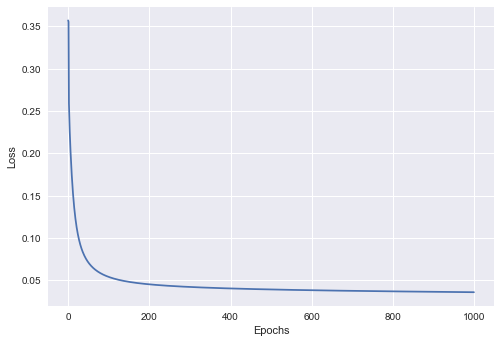

In [18]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
# visuals function is a function that we have written in python
from visuals import plot_decision_boundary

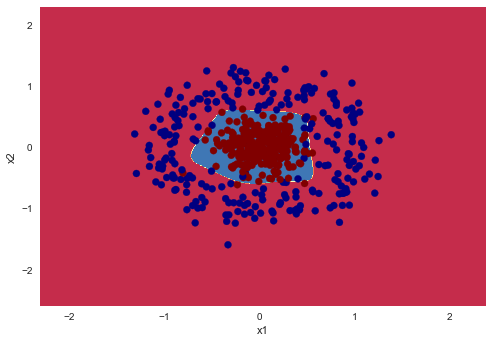

In [22]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [23]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


## Testing on some other non - linear dataset

### XOR Dataset

In [24]:
X= np.array([[0,0],[0,1],[1,0],[1,1]])
Y= np.array([0,1,1,0])

In [25]:
losses = train(X,Y,model,1000,0.5)

Epoch 0 Loss 2.9209
Epoch 50 Loss 1.3581
Epoch 100 Loss 0.8121
Epoch 150 Loss 0.1491
Epoch 200 Loss 0.0832
Epoch 250 Loss 0.0697
Epoch 300 Loss 0.0621
Epoch 350 Loss 0.0567
Epoch 400 Loss 0.0524
Epoch 450 Loss 0.0487
Epoch 500 Loss 0.0455
Epoch 550 Loss 0.0426
Epoch 600 Loss 0.0400
Epoch 650 Loss 0.0375
Epoch 700 Loss 0.0352
Epoch 750 Loss 0.0330
Epoch 800 Loss 0.0309
Epoch 850 Loss 0.0290
Epoch 900 Loss 0.0272
Epoch 950 Loss 0.0256


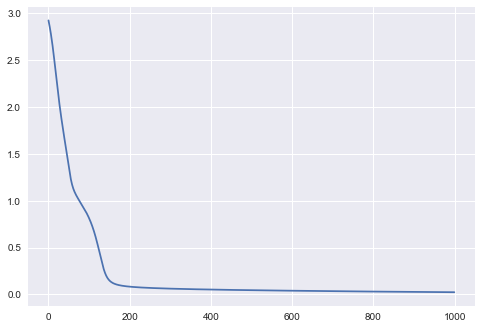

In [26]:
plt.plot(losses)
plt.show()

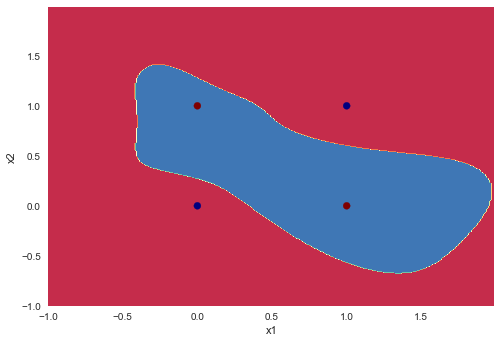

In [27]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [28]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 100.0000


## Other Datasets

In [29]:
from sklearn.datasets import make_moons,make_classification

In [30]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Accuracy 100.0000


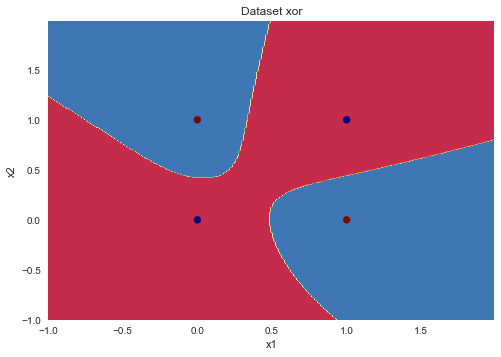

Training Accuracy 96.0000


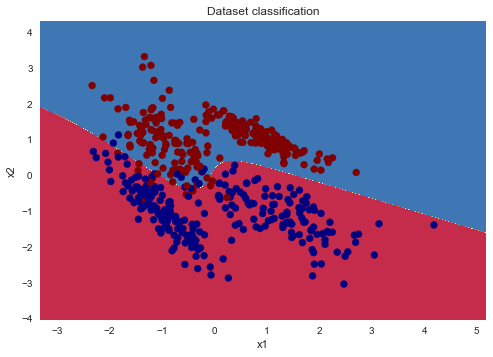

Training Accuracy 97.4000


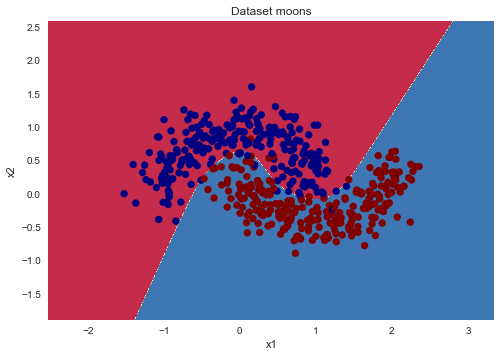

Training Accuracy 96.4000


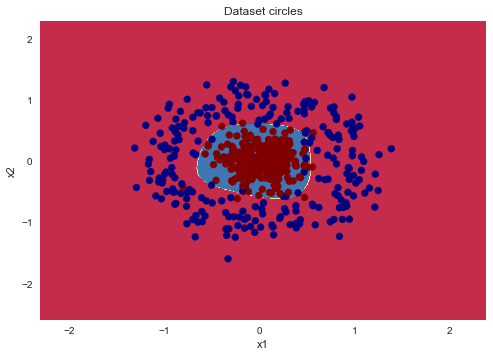

In [33]:
datasets = ["xor","classification","moons","circles"]
id=1
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy %.4f"%(training_accuracy*100))
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    id += 1
    plt.show()